# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
b = pd.read_csv("yelp_boston.csv")
b.categories = b.categories.apply(lambda x: x.replace("[", "").replace("]", "").replace(",","").lower()[1:-1].split('"'))
b.categories = b.categories.apply(lambda x: [i for i in x if i!= " "])
b=b.rename(columns={"search category": "search_cat"})

In [201]:
b.head()

,name,url,review_count,categories,rating,snippet_text,location,neighborhood,latitude,longitude,search_cat
0,Wheelhouse,http://www.yelp.com/biz/wheelhouse-boston-3,101,"[breakfast & brunch, breakfast_brunch, burgers...",4.5,"After going to Wheelhouse, you'll never order ...","{""cross_streets"": ""Milk St & Batterymarch Arm""...",Financial District,42.357926,-71.053962,restaurants
1,Tenoch Mexican,http://www.yelp.com/biz/tenoch-mexican-boston,121,"[mexican, mexican]",4.5,"So it's official, folks. We've finished our sa...","{""city"": ""Boston"", ""display_address"": [""3 Lewi...",North End,42.363309,-71.051800,restaurants
2,O Ya,http://www.yelp.com/biz/o-ya-boston,450,"[japanese, japanese]",4.5,My husband and I came here to celebrate our 20...,"{""city"": ""Boston"", ""display_address"": [""9 E St...",Waterfront,42.351408,-71.056867,restaurants
3,Locale,http://www.yelp.com/biz/locale-boston,121,"[italian, italian, pizza, pizza]",4.5,Truly thankful that we stumbled on Locale whil...,"{""cross_streets"": ""Fleet St & Tileston St"", ""c...",North End,42.365085,-71.053187,restaurants
4,Neptune Oyster,http://www.yelp.com/biz/neptune-oyster-boston,2487,"[seafood, seafood, live/raw food, raw_food]",4.5,Best lobster roll on the whole trip..... and I...,"{""cross_streets"": ""Hull St & Stillman St"", ""ci...",North End,42.363618,-71.056012,restaurants


In [202]:
all_cats = []
for c in b.categories:
    for i in range(len(c)):
        if c[i] not in all_cats:
            all_cats.append(c[i])

In [96]:
all_cats

['breakfast & brunch',
 'breakfast_brunch',
 'burgers',
 'sandwiches',
 'mexican',
 'japanese',
 'italian',
 'pizza',
 'seafood',
 'live/raw food',
 'raw_food',
 'american (new)',
 'newamerican',
 'mediterranean',
 'vegan',
 'gluten-free',
 'gluten_free',
 'spanish',
 'wine bars',
 'wine_bars',
 'tapas/small plates',
 'tapasmallplates',
 'salad',
 'juice bars & smoothies',
 'juicebars',
 'vegetarian',
 'indian',
 'indpak',
 'belgian',
 'american (traditional)',
 'tradamerican',
 'pubs',
 'korean',
 'asian fusion',
 'asianfusion',
 'lounges',
 'coffee & tea',
 'coffee',
 'cafes',
 'delis',
 'grocery',
 'bakeries',
 'gastropubs',
 'bars',
 'cocktail bars',
 'cocktailbars',
 'desserts',
 'french',
 'steakhouses',
 'steak',
 'cheese shops',
 'cheese',
 'sushi bars',
 'sushi',
 'bubble tea',
 'bubbletea',
 'vietnamese',
 'caterers',
 'catering',
 'cheesesteaks',
 'diners',
 'turkish',
 'falafel',
 'pakistani',
 'bangladeshi',
 'himalayan/nepalese',
 'himalayan',
 'halal',
 'fast food',
 'ho

In [265]:
# cuisines
cus_map = {'american':['burgers', 'american (new)',
 'newamerican',  'american (traditional)',
 'tradamerican', 'steakhouses',
 'steak', 'cheesesteaks', 'fast food',
 'hotdogs'],
'breakfast':['breakfast & brunch',
 'breakfast_brunch', 'diners'],
'mexican':['mexican'],
'japanese':['japanese', 'sushi bars',
 'sushi', 'ramen'],
'vietnamese':['vietnamese'],
'italian':['italian',
 'pizza'],
'seafood':['seafood',
 'live/raw food',
 'raw_food'],
'mediterranean':['mediterranean', 'greek'],
'sandwich':['sandwiches', 'deli'],
'healthy':['salad',
 'juice bars & smoothies',
 'juicebars'],
'spanish':['spanish', 'tapas/small plates',
 'tapasmallplates'],
'asian_fusion':['asian fusion',
 'asianfusion'],
'indian_pakistani':['indian',
 'indpak', 'bangladeshi', 'pakistani'],
'french':['french'],
'chinese':['hot pot',
 'hotpot',
 'chinese', 'dim sum',
 'dimsum',
 'cantonese'],
'latin':['latin american',
 'latin'],
'thai':['thai'],
'middle_east':['armenian',
 'middle eastern',
 'mideastern'],
'polish_ukr':['polish',
 'ukrainian']}

# establishments
estab_dict = {'bars' : ['wine bars',
 'wine_bars', 'bars',
 'cocktail bars',
 'cocktailbars', 'pubs', 'gastropubs'],
'bakery/dessert':['ice cream & frozen yogurt',
 'icecream',
 'donuts', 'bakeries', 'desserts', 'cupcakes'],
'coffee/cafe':['coffee & tea',
 'coffee',
 'cafes']}

In [266]:
cus_map.keys()

dict_keys(['american', 'breakfast', 'mexican', 'japanese', 'vietnamese', 'italian', 'seafood', 'mediterranean', 'sandwich', 'healthy', 'spanish', 'asian_fusion', 'indian_pakistani', 'french', 'chinese', 'latin', 'thai', 'middle_east', 'polish_ukr'])

In [267]:
estab_dict.keys()

dict_keys(['bars', 'bakery/dessert', 'coffee/cafe'])

In [268]:
b['cuisine']=np.empty((len(b), 0)).tolist()
b['estab']=''

In [269]:
b.search_cat.unique()

array(['restaurants', 'coffee', 'newamerican', 'french', 'sandwiches',
       'cafes', 'indpak', 'sushi', 'japanese', 'chinese', 'mexican',
       'thai', 'pizza', 'donuts', 'bakeries', 'italian', 'vietnamese',
       'ethnicmarkets'], dtype=object)

In [270]:
estab_map={"restaurants": "restaurant", "cafes": "coffee/cafe", "coffee": "coffee/cafe",
          "bakeries": "bakery/dessert", "donuts": "bakery/dessert"}

In [271]:
b.estab=b.search_cat.map(estab_map, 'ignore')
b.estab=b.estab.fillna("restaurant")

In [272]:
for key in cus_map.keys():
    for i,c in enumerate(b.categories):
        for x in c:
            if x in cus_map[key] and key not in b.loc[i,'cuisine']:
                b.loc[i, 'cuisine'].append(key)

for key in estab_dict.keys():
    for i,c in enumerate(b.categories):
        for x in c:
            if x in estab_dict[key]:
                b.loc[i, 'estab']=key
b

,name,url,review_count,categories,rating,snippet_text,location,neighborhood,latitude,longitude,search_cat,cuisine,estab
0,Wheelhouse,http://www.yelp.com/biz/wheelhouse-boston-3,101,"[breakfast & brunch, breakfast_brunch, burgers...",4.5,"After going to Wheelhouse, you'll never order ...","{""cross_streets"": ""Milk St & Batterymarch Arm""...",Financial District,42.357926,-71.053962,restaurants,"[american, breakfast, sandwich]",restaurant
1,Tenoch Mexican,http://www.yelp.com/biz/tenoch-mexican-boston,121,"[mexican, mexican]",4.5,"So it's official, folks. We've finished our sa...","{""city"": ""Boston"", ""display_address"": [""3 Lewi...",North End,42.363309,-71.051800,restaurants,[mexican],restaurant
2,O Ya,http://www.yelp.com/biz/o-ya-boston,450,"[japanese, japanese]",4.5,My husband and I came here to celebrate our 20...,"{""city"": ""Boston"", ""display_address"": [""9 E St...",Waterfront,42.351408,-71.056867,restaurants,[japanese],restaurant
3,Locale,http://www.yelp.com/biz/locale-boston,121,"[italian, italian, pizza, pizza]",4.5,Truly thankful that we stumbled on Locale whil...,"{""cross_streets"": ""Fleet St & Tileston St"", ""c...",North End,42.365085,-71.053187,restaurants,[italian],restaurant
4,Neptune Oyster,http://www.yelp.com/biz/neptune-oyster-boston,2487,"[seafood, seafood, live/raw food, raw_food]",4.5,Best lobster roll on the whole trip..... and I...,"{""cross_streets"": ""Hull St & Stillman St"", ""ci...",North End,42.363618,-71.056012,restaurants,[seafood],restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,El Madina,http://www.yelp.com/biz/el-madina-revere,8,"[mediterranean, mediterranean, middle eastern,...",4.5,I went in around closing tonight because I was...,"{""city"": ""Revere"", ""display_address"": [""148 Sq...",NaN,42.423248,-71.009514,ethnicmarkets,"[mediterranean, middle_east]",restaurant
339,The Shops at Porter,http://www.yelp.com/biz/the-shops-at-porter-ca...,79,"[japanese, japanese, ethnic food, ethnicmarket...",4.0,This is like a small (chibi) version of the Ja...,"{""city"": ""Cambridge"", ""display_address"": [""Uni...",Porter Square,42.387192,-71.118778,ethnicmarkets,[japanese],restaurant
340,Bazaar International Gourmet,http://www.yelp.com/biz/bazaar-international-g...,52,"[ethnic food, ethnicmarkets, grocery, grocery]",4.0,"The Bazaar at 1432 Beacon Street, Brookline Ma...","{""city"": ""Brookline"", ""display_address"": [""143...",Coolidge Corner,42.341065,-71.126470,ethnicmarkets,[],restaurant
341,G Mart 2 Supermarket,http://www.yelp.com/biz/g-mart-2-supermarket-b...,48,"[grocery, grocery, ethnic food, ethnicmarkets]",4.0,Everything is inexpensive! I was so surprised ...,"{""cross_streets"": ""Beach St & Tufts St"", ""city...",Waterfront,42.351569,-71.058365,ethnicmarkets,[],restaurant


In [273]:
b.estab.value_counts()

restaurant        236
coffee/cafe        52
bakery/dessert     36
bars               19
Name: estab, dtype: int64

In [274]:
b.neighborhood.unique()

array(['Financial District', 'North End', 'Waterfront', 'East Boston',
       'Downtown', 'South End', nan, 'Beacon Hill', 'Back Bay',
       'South Boston', 'Chinatown', 'Allston/Brighton', 'Charlestown',
       'Kendall Square/MIT', 'Dorchester', 'Teele Square',
       'Jamaica Plain', 'Inman Square', 'Harvard Square', 'Fenway',
       'Mission Hill', 'Porter Square', 'North Cambridge', 'West Roxbury',
       'Coolidge Corner'], dtype=object)

In [275]:
b.search_cat.unique()

array(['restaurants', 'coffee', 'newamerican', 'french', 'sandwiches',
       'cafes', 'indpak', 'sushi', 'japanese', 'chinese', 'mexican',
       'thai', 'pizza', 'donuts', 'bakeries', 'italian', 'vietnamese',
       'ethnicmarkets'], dtype=object)

In [280]:
mask = b.categories.apply(lambda x: 'bars' in x)
b_check = b[mask]
b_check

,name,url,review_count,categories,rating,snippet_text,location,neighborhood,latitude,longitude,search_cat,cuisine,estab
42,Deuxave,http://www.yelp.com/biz/deuxave-boston,310,"[american (new), newamerican, bars, bars]",4.0,All I know is that we left much happier than w...,"{""city"": ""Boston"", ""display_address"": [""371 Co...",Back Bay,42.349521,-71.089166,newamerican,[american],bars
43,Corner Tavern,http://www.yelp.com/biz/corner-tavern-boston,181,"[bars, bars, american (new), newamerican]",4.0,I ordered the bacon and pepperjack grilled che...,"{""cross_streets"": ""Massachusetts Ave & Herefor...",Back Bay,42.350159,-71.089432,newamerican,[american],bars
52,Sister Sorel,http://www.yelp.com/biz/sister-sorel-boston,65,"[bars, bars, american (new), newamerican]",4.0,I came here this weekend after eating at Tremo...,"{""city"": ""Boston"", ""display_address"": [""645 Tr...",South End,42.342191,-71.075072,newamerican,[american],bars
63,Mistral,http://www.yelp.com/biz/mistral-boston,675,"[french, french, bars, bars]",4.0,This place really is that good. They even scre...,"{""cross_streets"": ""Clarendon St & Cahners Pl"",...",Back Bay,42.348158,-71.072759,french,[french],bars
67,West Bridge,http://www.yelp.com/biz/west-bridge-cambridge,271,"[bars, bars, american (new), newamerican, fren...",4.0,First of all you need to know that my father i...,"{""city"": ""Cambridge"", ""display_address"": [""1 K...",Kendall Square/MIT,42.366569,-71.090187,french,"[american, french]",bars
142,Genki Ya,http://www.yelp.com/biz/genki-ya-boston,204,"[sushi bars, sushi, japanese, japanese, bars, ...",4.0,"Enjoyed the spicy tuna, salmon and yellowtail ...","{""cross_streets"": ""Van Rensselaer Pl & Stuart ...",NaN,42.351246,-71.064722,sushi,[japanese],bars
166,Genki Ya,http://www.yelp.com/biz/genki-ya-boston,204,"[sushi bars, sushi, japanese, japanese, bars, ...",4.0,"Enjoyed the spicy tuna, salmon and yellowtail ...","{""cross_streets"": ""Van Rensselaer Pl & Stuart ...",NaN,42.351246,-71.064722,japanese,[japanese],bars
239,OTTO,http://www.yelp.com/biz/otto-boston,107,"[pizza, pizza, bars, bars]",4.0,"Can only review them based on delivery, not th...","{""city"": ""Boston"", ""display_address"": [""888 Co...",Allston/Brighton,42.350441,-71.115257,pizza,[italian],bars
297,Anchovies,http://www.yelp.com/biz/anchovies-boston,269,"[italian, italian, bars, bars]",4.0,I lived in the south end for three years and t...,"{""cross_streets"": ""Braddock Park & Holyoke St""...",South End,42.343939,-71.077598,italian,[italian],bars


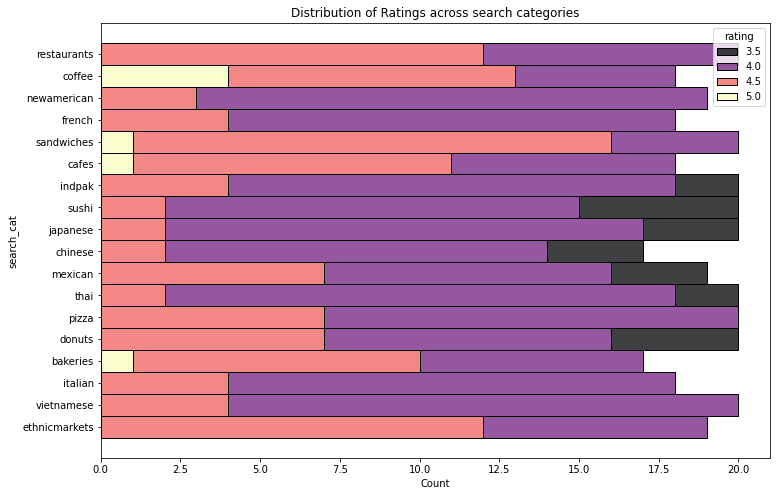

In [281]:
plt.figure(figsize=(12,8))
sns.histplot(data=b, y="search_cat", hue="rating", bins=5, multiple="stack", palette="magma")
plt.title("Distribution of Ratings across search categories")
plt.show()

## Ideas

- could create a quiz-type format where the user goes sequentially through questions to filter the data **could include option to skip, go back etc.**
    - start with map of boston: choose your neighborhood
    - what type of restaurant are you looking for?
    - what kind of food are you in the mood for?
    - do you have any dietary restrictions?
    - this might be ambitious but could have the map dynamically updating points
    - RESULT: best result/highest rating, with information about restaurant, other suggestions if the user is not interested
- could also focus on a particular search category and try finding values from the text snippets for additional details (i.e. coffee/cafe finder or pizza locator)
- ADD OTHER IDEAS

In [284]:
# b.to_csv('boston_yelp_clean.csv')